In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, scale
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# this is a bad code 

df_epidural = pd.read_csv("EpiduralHemorrhageRemovedFlags.csv")
df_labels = pd.read_csv("hemorrhage-labels-removed-flags.csv")
df_interparenchymal = pd.read_csv("IntraparenchymalHemorrhageRemovedFlags.csv")
df_subarachnoid = pd.read_csv("SubarachnoidHemorrhageRemovedFlags.csv")
df_subdural = pd.read_csv("SubduralHemorrhageRemovedFlags.csv")
df_multiple = pd.read_csv("MultipleHemorrhageRemovedFlags.csv")

In [3]:
# this is a super ugly code 

df_labels = df_labels.drop('Unnamed: 0', axis=1)
df_epidural = df_epidural.drop('Unnamed: 0', axis=1)
df_interparenchymal = df_interparenchymal.drop('Unnamed: 0', axis=1)
df_subarachnoid = df_subarachnoid.drop('Unnamed: 0', axis=1)
df_subdural = df_subdural.drop('Unnamed: 0', axis=1)
df_multiple = df_multiple.drop('Unnamed: 0', axis=1)

In [4]:
df_labels

,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_000012eaf,0,0,0,0,0,0
1,ID_000039fa0,0,0,0,0,0,0
2,ID_00005679d,0,0,0,0,0,0
3,ID_00008ce3c,0,0,0,0,0,0
4,ID_0000950d7,0,0,0,0,0,0
...,...,...,...,...,...,...,...
752789,ID_ffff82e46,0,0,0,0,0,0
752790,ID_ffff922b9,1,0,0,1,0,0
752791,ID_ffffb670a,1,0,0,0,1,0
752792,ID_ffffcbff8,0,0,0,0,0,0


In [5]:
labels_1 = df_labels[['any', 'epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural']]
labels_1

,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
752789,0,0,0,0,0,0
752790,1,0,0,1,0,0
752791,1,0,0,0,1,0
752792,0,0,0,0,0,0


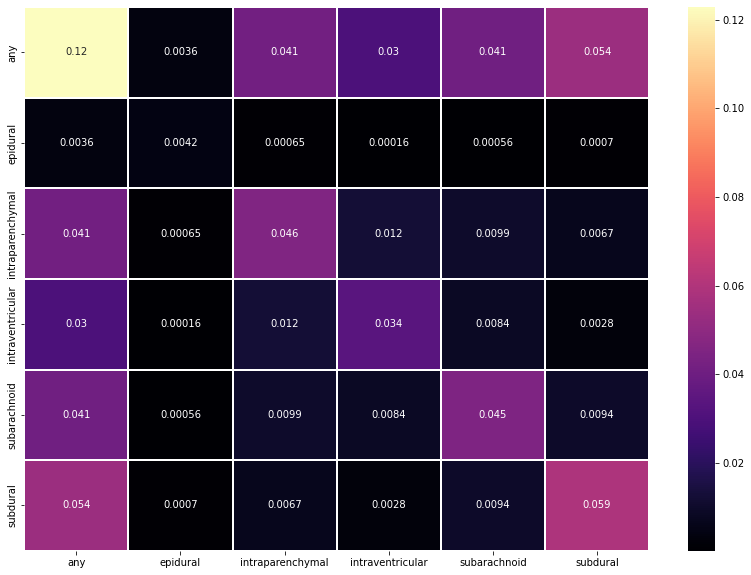

In [6]:
fig,ax = plt.subplots(figsize=(14, 10))

#sns.set(font_scale=1.4)
sns.heatmap(labels_1.cov(), ax=ax, linewidths=0.05,cmap="magma",annot=True)
plt.show()

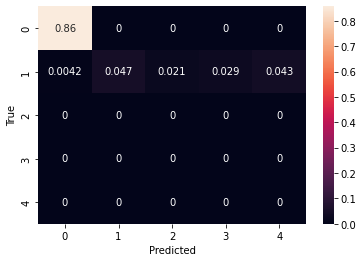

In [7]:
# trying to use the data from the df_labels to draw the matrix confusion 
labels = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural']

y_true = df_labels['any']
y_predict = df_labels[['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural']].values.argmax(axis=1)

cm = confusion_matrix(y_true, y_predict)
n_samples = np.sum(cm)
cm_norm = cm / n_samples

fig = plt.figure()
ax = fig.add_subplot(111)

sns.heatmap(cm_norm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ==> seems like not a good way to do

### ==> not the best way or Im doing wrong LOL

### Convolutional Neural Network

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [9]:
model = Sequential()
model.add(Dense(256, input_shape=(784,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Activation('softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              